In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
# 数据是否需要标准化
scale = False

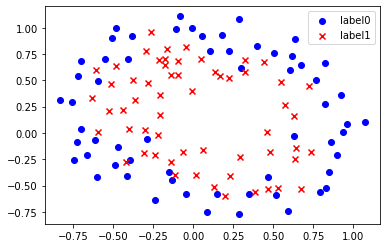

In [2]:
# 载入数据
data = np.genfromtxt("LR-testSet2.txt", delimiter=",")
x_data = data[:,:-1]
y_data = data[:,-1,np.newaxis]
    
def plot():
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    # 切分不同类别的数据
    for i in range(len(x_data)):
        if y_data[i]==0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])

    # 画图
    scatter0 = plt.scatter(x0, y0, c='b', marker='o')
    scatter1 = plt.scatter(x1, y1, c='r', marker='x')
    #画图例
    plt.legend(handles=[scatter0,scatter1],labels=['label0','label1'],loc='best')
    
plot()
plt.show()

In [3]:
#定义多项式回归，degree的值可以调节多项式的特征
poly_reg = PolynomialFeatures(degree=3)
#特征处理
x_poly = poly_reg.fit_transform(x_data)

In [4]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

def cost(xMat,yMat,ws):
    left = np.multiply(yMat, np.log(sigmoid(xMat*ws)))
    right = np.multiply(1 - yMat, np.log(1 - sigmoid(xMat*ws)))
    return np.sum(left + right) / -(len(xMat))

def gradAscent(xArr, yArr):
    
    if scale == True:
        xArr = preprocessing.scale(xArr)
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    
    lr = 0.03
    epochs = 50000
    costList = []
    # 计算数据列数，有几列就有几个权值
    m,n = np.shape(xMat)
    # 初始化权值
    ws = np.mat(np.ones((n,1)))
    
    for i in range(epochs+1):             
        # xMat和weights矩阵相乘
        h = sigmoid(xMat*ws)   
        # 计算误差
        ws_grad = xMat.T*(h - yMat)/m
        ws = ws - lr*ws_grad 
        
        if i % 50 == 0:
            costList.append(cost(xMat,yMat,ws))
    return ws,costList

In [5]:
# 训练模型，得到权值和cost值的变化
ws,costList = gradAscent(x_poly, y_data)
print(ws)

[[ 4.16787292]
 [ 2.72213524]
 [ 4.55120018]
 [-9.76109006]
 [-5.34880198]
 [-8.51458023]
 [-0.55950401]
 [-1.55418165]
 [-0.75929829]
 [-2.88573877]]


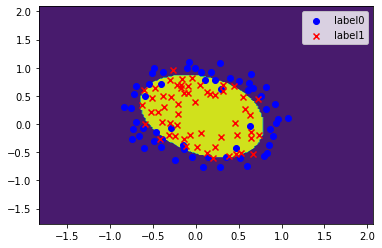

In [8]:

# 获取数据值所在的范围
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = sigmoid(poly_reg.fit_transform(np.c_[xx.ravel(), yy.ravel()]).dot(np.array(ws)))# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
for i in range(len(z)):
    if z[i] > 0.5:
        z[i] = 1
    else:
        z[i] = 0
z = z.reshape(xx.shape)

# 等高线图
cs = plt.contourf(xx, yy, z)
plot() 
plt.show()

In [9]:
# 预测
def predict(x_data, ws):
#     if scale == True:
#         x_data = preprocessing.scale(x_data)
    xMat = np.mat(x_data)
    ws = np.mat(ws)
    return [1 if x >= 0.5 else 0 for x in sigmoid(xMat*ws)]

predictions = predict(x_poly, ws)

print(classification_report(y_data, predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85        60
         1.0       0.83      0.86      0.85        58

    accuracy                           0.85       118
   macro avg       0.85      0.85      0.85       118
weighted avg       0.85      0.85      0.85       118



In [10]:
test = [[2,3]]
# 定义多项式回归,degree的值可以调节多项式的特征
poly_reg  = PolynomialFeatures(degree=3) 
# 特征处理
x_poly = poly_reg.fit_transform(test)

In [11]:
x_poly

array([[ 1.,  2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])

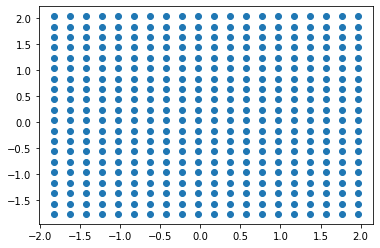

In [13]:
# 获取数据值所在的范围
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

plt.scatter(xx,yy)
plt.show()